In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Aimpr\AppData\Local\Temp\ipykernel_32084\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


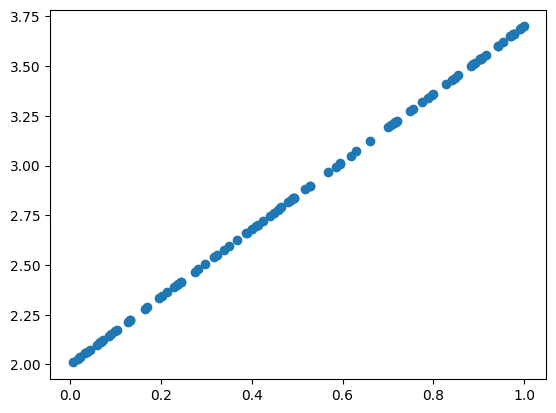

In [3]:
sample = 100

m = 1.7
b = 2
X = np.random.rand(sample, 1)
y =  m * X + b 

plt.scatter(X, y)


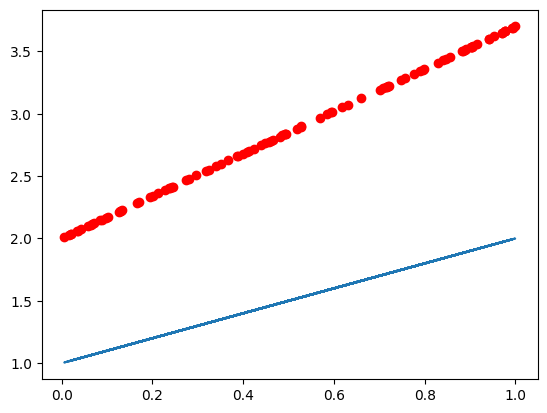

In [4]:
def hx(X, intercept, slope):
    return intercept + (slope * X)


plt.scatter(X, y, color='red')
plt.plot(X, hx(X, 1, 1))

In [5]:
y_pre = pd.DataFrame(hx(X, 1, 1), columns=['y predict'])
y_true = pd.DataFrame(y , columns=['y true'])
y_sub = pd.DataFrame(np.subtract(hx(X, 1, 1), y), columns=['y subtrack'])
concat = pd.concat([y_pre, y_true, y_sub], axis=1)
print(concat)

print(y_pre.shape)
print(y_true.shape)

    y predict    y true  y subtrack
0    1.969897  3.648825   -1.678928
1    1.317323  2.539450   -1.222126
2    1.630010  3.071017   -1.441007
3    1.129368  2.219926   -1.090558
4    1.066991  2.113885   -1.046894
..        ...       ...         ...
95   1.999475  3.699108   -1.699633
96   1.491117  2.834899   -1.343782
97   1.409232  2.695695   -1.286463
98   1.016139  2.027436   -1.011297
99   1.132299  2.224908   -1.092609

[100 rows x 3 columns]
(100, 1)
(100, 1)


In [6]:
def gradient(interation, X, y):
    lr = 0.2
    b0 = 1
    w0 = 1
    m = len(y)
    inter_b = []
    slo_w = []
    
    for _ in range(interation):

        step0 = hx(X, b0, w0) 
        step1 = np.subtract(step0, y)
        
        w = step1 * X #slope
        b = np.sum(step1) #inter

        w = np.sum(w) * (1/m)
        b = b * (1/m)

        result_b = lr*(b)
        result_w = lr*(w)

        b0 -= result_b
        w0 -= result_w
        inter_b.append(b0)
        slo_w.append(w0)

    
    return inter_b,slo_w

print(gradient(10, X, y))

([1.271359541604964, 1.4729143323413694, 1.6225643101529874, 1.7336202410550674, 1.8159802735446822, 1.8770048526920788, 1.9221673272494668, 1.9555377567027739, 1.9801426817967833, 1.9982326585215002], [1.1523691091443287, 1.2660987963273231, 1.351088635200226, 1.414700290493129, 1.4624081753034444, 1.4982832955017, 1.5253530480726432, 1.5458687758242295, 1.5615047275168599, 1.5735060094159585])


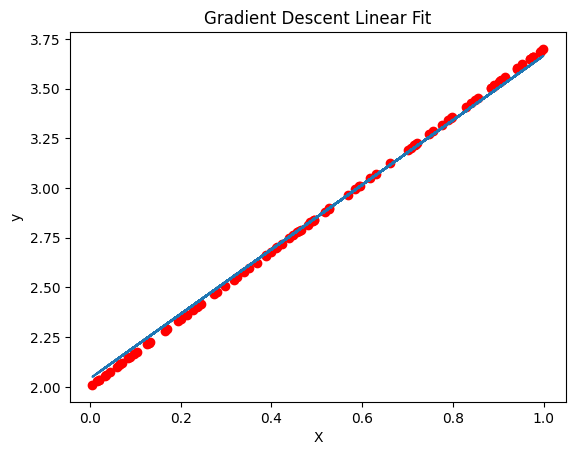

In [7]:

iterations = 25
b_values, w_values = gradient(iterations, X, y)
p_inter = []
p_slo = []

for i in b_values:
    p_inter.append(i)
    
for i2 in w_values:
    p_slo.append(i2)

# Final parameters
final_b = p_inter[-1]
final_w = p_slo[-1]

# Plotting
plt.scatter(X, y, color='red')
plt.plot(X, hx(X, final_b, final_w))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Linear Fit')
plt.show()

2.04130266786908
1.623789442321035
0.00029454513410279105


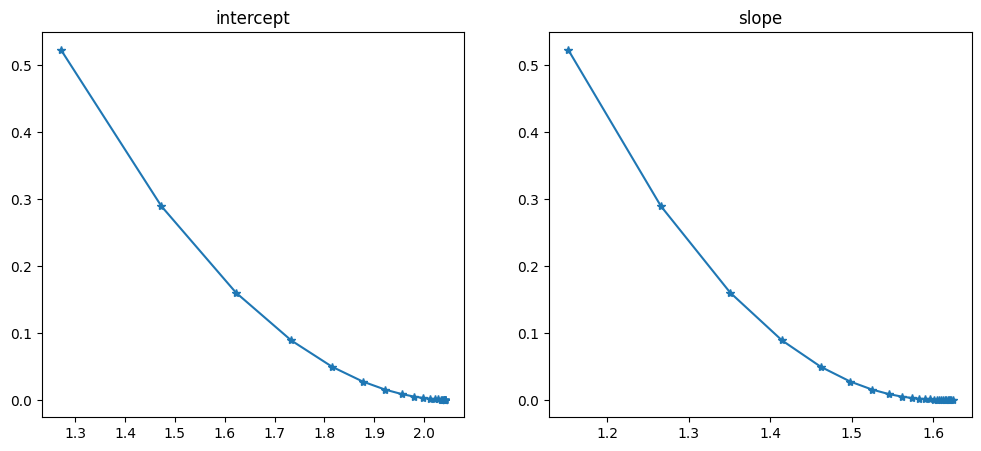

In [8]:
cost = []
def costfuction(X, y, b0, w0):
    m = len(y)
    output = []
    
    step0 = hx(X, b0, w0)
    step1 = np.subtract(step0, y)
    step2 = step1**2
    step3 = np.sum(step2)
    step4 = step3 * (1/ (2 * m))
    #output.append(step4)
    return step4

for i in range(iterations):
    output = costfuction(X, y, p_inter[i], p_slo[i])
    cost.append(output)

plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1)
plt.plot(p_inter, cost, marker='*')
plt.title("intercept")

plt.subplot(1,2,2)
plt.plot(p_slo, cost, marker='*')
plt.title("slope")

print(p_inter[-1])
print(p_slo[-1])
print(cost[-1])

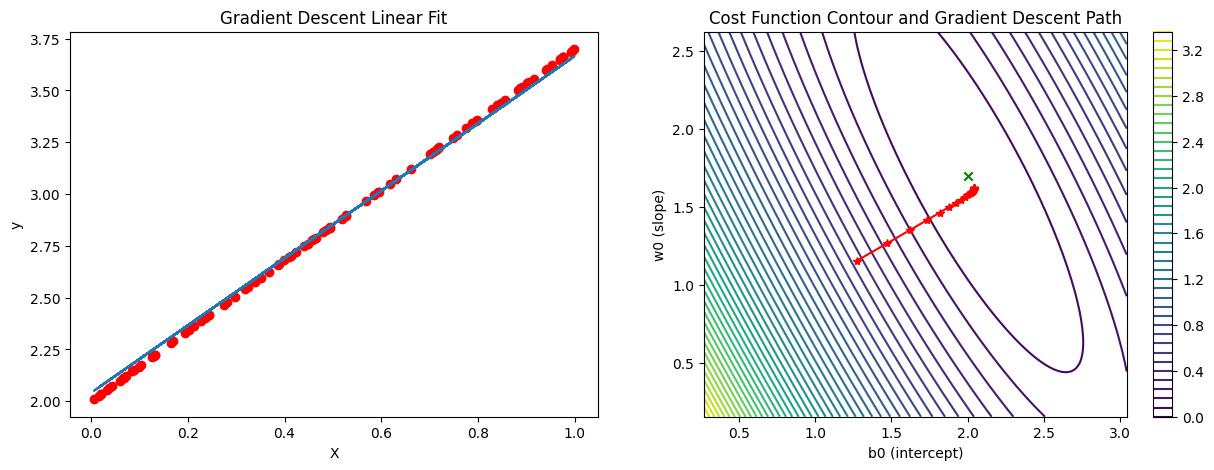

In [9]:
b0_range = np.linspace(min(b_values) - 1, max(b_values) + 1, 100)
w0_range = np.linspace(min(w_values) - 1, max(w_values) + 1, 100)
B, W = np.meshgrid(b0_range, w0_range)
Z = np.array([[costfuction(X, y, b, w) for b in b0_range] for w in w0_range])

# Generate cost values for gradient descent path
cost = [costfuction(X, y, b_values[i], w_values[i]) for i in range(iterations)]

# Plotting
plt.figure(figsize=(15, 5))

# Contour plot
plt.subplot(1,2,2)
plt.contour(B, W, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('b0 (intercept)')
plt.ylabel('w0 (slope)')
plt.scatter(2, 1.7, color='green', marker='x')
plt.title('Cost Function Contour and Gradient Descent Path')

plt.plot(b_values, w_values, 'r*-', label='Gradient Descent Path')
for i in range(len(b_values)):
    plt.plot(b_values[i], w_values[i])

plt.subplot(1,2,1)
plt.scatter(X, y, color='red')
plt.plot(X, hx(X, final_b, final_w))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Linear Fit')

plt.show()